<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/BiseccionTallerPunto5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmo de bisección
Omar torres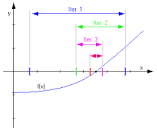

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

**Inicialización de variable**

In [11]:
err = float(input("Digite el error aceptable "))
xl  = float(input("Ingrese la frontera inferior del intervalo "))
xu  = float(input("Ingrese la frontera superior del intervalo "))

xr_i = 0
xr_f = 0


Digite el error aceptable 0.001
Ingrese la frontera inferior del intervalo 2.8
Ingrese la frontera superior del intervalo 3.2


Grafica de f(x)

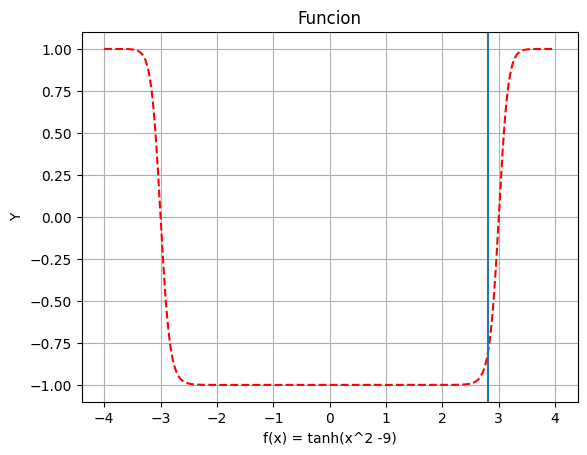

In [7]:
#𝑓(𝑥) = tanh(𝑥 2 − 9)
def graf_function():
  X = list(np.arange(-4,4, err))
  Y=[(math.tanh(x**2 -9)) for x in X]
  plt.title("Funcion")
  plt.xlabel("f(x) = tanh(x^2 -9)")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=2.8, ymin=0.0, ymax=10)
  plt.grid()
  plt.show()

graf_function()

Grafica de f(x) = x^10 - 1

**Clase Biseccion**


In [9]:
class Biseccion:
  def __init__(self, xl,xu,err):
    self.__xl = xl
    self.__xu =xu
    self.__xr_i = 0
    self.__xr_f = 1
    self.__err = err
    self.__lista_err = []
    self.__err_actual =1
    self.__convergencia = False
    #self.__n = 100    #Calcularlo

  def  __raiz_aprox(self):
    self.__xr_f = (self.__xl+ self.__xu)/2

  def __errorAptual(self):
    error=0
    if self.__xr_f != 0:
      error = (self.__xr_f - self.__xr_i)/self.__xr_f
    self.__err_actual = np.abs(error)
    return self.__err_actual

  def get_error(self):
      return self.__err_actual

  def __conver(self):
       fl = ((self.__xl**4)+ 3*(self.__xl**3) - 2)
       fu = ((self.__xu**4)+ 3*(self.__xu**3) - 2)

       if fl*fu < 0:
         self.__converencia = False  #Hay convergencia
       else:   self.__convegencia=True
       return self.__convergencia

  def __cal_funtions(self):
    fxl = ((self.__xl**4)+ 3*(self.__xl**3) - 2)      #Calcula f(xl)
    fxr = ((self.__xr_f**4)+ 3*(self.__xr_f**3) - 2)  #Calcula f(xr)
    return fxl, fxr

  def get_lista_err(self):
       return self.__lista_err

  def __printf(self, i,xl ,xu,xrf,err):                              #Imprime los valores parciales de los f(x) y el error
      print("____________________________________________Valores parciales________________________________________________")
     # i,self.__xr_i,,self.__xu,self.__xr_f,self.__err_actual
      print("i = ", i)
      print("xl = ",xl)
      print("xu = ",xu)
      print("xrf = ",xrf)
      print("error = ",err)


  def calF_raiz(self):
        salir =True
        err =  self.__err_actual
        i =0
        while ((err >= self.__err)) :
          i = i+1
          self.__printf(i,self.__xl,self.__xu,self.__xr_f,self.__err_actual)
          err = self.__errorAptual()
          if err <= 1:
             self.__lista_err.append(err)
          self.__xr_i  = self.__xr_f
          self.__raiz_aprox()
          fxl, fxr =self.__cal_funtions()
          if self.__conver() == False:
            if fxl*fxr < 0:                     #Evalua producto de funciones para hacer el cambio de las fronteras intervalo de convergencia
              self.__xu = self.__xr_f
            elif fxl*fxr > 0:
              self.__xl = self.__xr_f
            elif   fxl*fxr == 0:
              salir=False
            else:
              salir = False

        return self.__xr_f




**Programa principal**

In [12]:
obj = Biseccion(xl,xu,err)
lista_errores = []
def main():
  result = obj.calF_raiz()
  error = obj.get_error()
  print("_______________________________________Resultados Valor de la raiz________________________________________________________")
  print("Raiz = ",result)
  print("Error ",error)

if __name__=='__main__':
   main()
lista_errores = obj.get_lista_err()

____________________________________________Valores parciales________________________________________________
i =  1
xl =  2.8
xu =  3.2
xrf =  1
error =  1
____________________________________________Valores parciales________________________________________________
i =  2
xl =  3.0
xu =  3.2
xrf =  3.0
error =  1.0
____________________________________________Valores parciales________________________________________________
i =  3
xl =  3.1
xu =  3.2
xrf =  3.1
error =  0.6666666666666666
____________________________________________Valores parciales________________________________________________
i =  4
xl =  3.1500000000000004
xu =  3.2
xrf =  3.1500000000000004
error =  0.03225806451612906
____________________________________________Valores parciales________________________________________________
i =  5
xl =  3.1750000000000003
xu =  3.2
xrf =  3.1750000000000003
error =  0.015873015873015955
____________________________________________Valores parciales______________________________

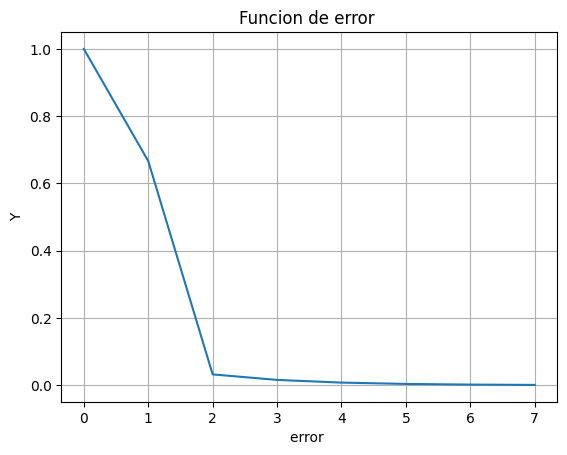

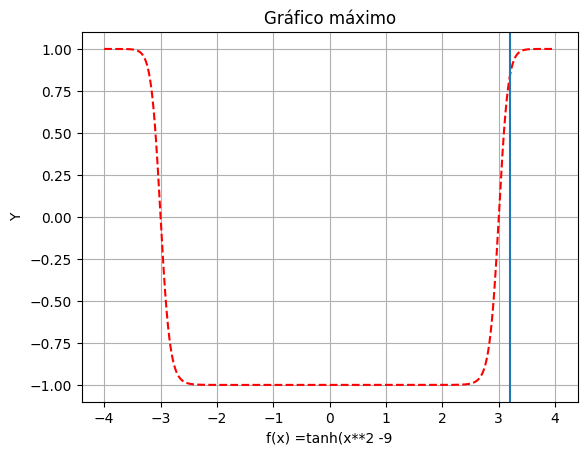

In [14]:
def graf_function():
  xl = -1.5
  xu = 1
  X = list(np.arange(-4,4, err))
  Y=[(math.tanh(x**2 -9)) for x in X]
  plt.title("Gráfico máximo")
  plt.xlabel("f(x) =tanh(x**2 -9")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x= 3.1984375000000003, ymin=0.0, ymax=30)
  plt.grid()
  plt.show()

def graf_f():
  X = lista_errores
  Y = np.linspace(0, 10, num=15, endpoint=False)
  plt.title("Funcion de error ")
  plt.xlabel("error ")
  plt.ylabel("Y")
  plt.plot(lista_errores)
  plt.grid()
  plt.show()
graf_f()
graf_function()

